In [3]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('data.csv')

In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
print(df.columns)
print(df.dtypes)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')
id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean 

In [7]:
df = df.iloc[:,1:-1]

Encoding the 'diagnosis' feature using One hot Encoding

In [8]:
lb_make = LabelEncoder()
df["diagnosis_enc"] = lb_make.fit_transform(df["diagnosis"])

In [9]:
print(df.head())

  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean      ...        texture_worst  perimeter_worst  area_worst  \
0         0.2419      ...                17

In [10]:
print('Shape of the dataset',df.shape)
df.isnull().any().any()

Shape of the dataset (569, 32)


False

In [11]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 n

In [12]:
print(df['diagnosis'].describe())
print(df['diagnosis'].unique())
print(df['diagnosis'].value_counts())

count     569
unique      2
top         B
freq      357
Name: diagnosis, dtype: object
['M' 'B']
B    357
M    212
Name: diagnosis, dtype: int64


In [13]:
radius = df['radius_mean'].values
texture_mean = df['texture_mean']
radius_mean = df['radius_mean']
perimeter_mean = df['perimeter_mean']
diagnosis_enc = df['diagnosis_enc']

Histogram of Texture

Text(0.5,0,'Texture')

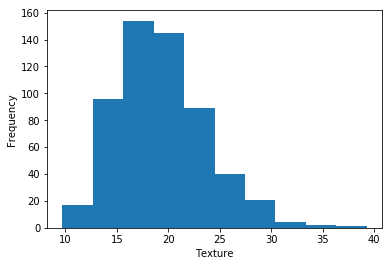

In [14]:
plt.hist(texture_mean)
plt.ylabel('Frequency')
plt.xlabel('Texture')

Line Plot of Radius

In [ ]:
radius_mean.plot()

Plot of the whole dataframe

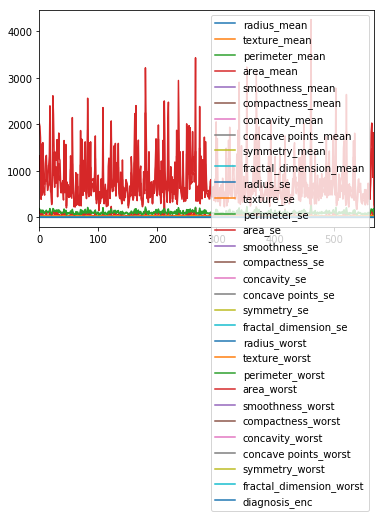

In [22]:
df.plot()

Changing the y-scale to log 

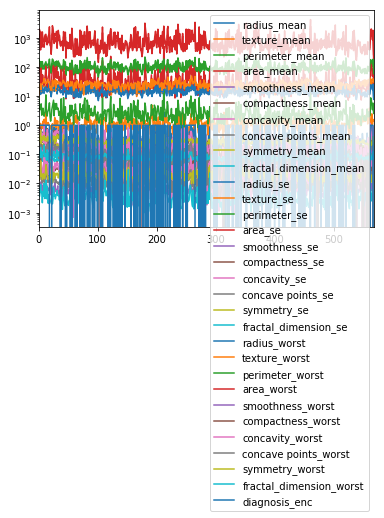

In [25]:
df.plot()
plt.yscale('log')

Box plot of texture by diagnosis

/srv/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,0,'Diagnosis of Tumor')

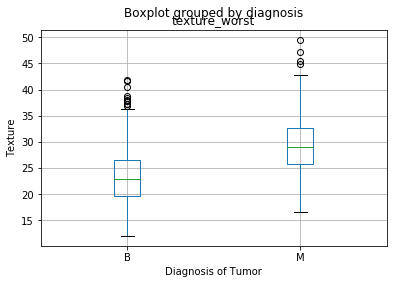

In [26]:
df.boxplot(column='texture_worst', by='diagnosis')
plt.ylabel('Texture')
plt.xlabel('Diagnosis of Tumor')

Scatter plot between Mean radius and diagnosis

In [2]:
plt.scatter(x=diagnosis_enc, y=radius_mean, alpha=0.8, edgecolors='r', s=30)	#Scatter plot
plt.ylabel('radius_mean')
plt.xlabel('diagnosis')
plt.title('Scatter Plot between radius and diagnosis')

NameError: name 'plt' is not defined

Scatter plot between Mean radius and mean perimeter

Text(0.5,1,'Scatter Plot between radius and perimeter')

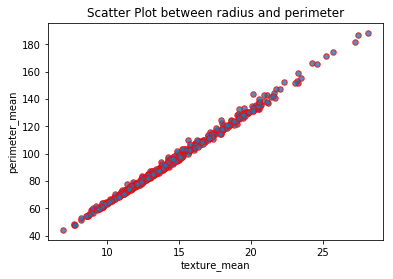

In [27]:
plt.scatter(x=radius_mean, y=perimeter_mean, alpha=0.8, edgecolors='r', s=30)	#Scatter plot
plt.ylabel('perimeter_mean')
plt.xlabel('texture_mean')
plt.title('Scatter Plot between radius and perimeter')

In [28]:
plt.show()

In [29]:
X = df.drop(['diagnosis_enc','diagnosis'],axis=1)	#Features
Y = df['diagnosis_enc']

Splitting the data into train and test set

In [30]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

Classification Algorithms

Using Logistic Regression

In [32]:
reg_all = linear_model.LogisticRegression()
reg_all.fit(X_train,Y_train)
predictions1=reg_all.predict(X_test)

In [34]:
print("By Logistic Regression")
print(predictions1)

By Logistic Regression
[0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 1 1]


In [57]:
print('Accuracy Score : ',accuracy_score(Y_test,predictions1))

Accuracy Score :  0.956140350877193


In [36]:
print(confusion_matrix(Y_test,predictions1))
print(classification_report(Y_test,predictions1))

[[70  1]
 [ 4 39]]
             precision    recall  f1-score   support

          0       0.95      0.99      0.97        71
          1       0.97      0.91      0.94        43

avg / total       0.96      0.96      0.96       114



Using K Neighbor Classifier

In [37]:
knn = KNeighborsClassifier(n_neighbors=10)			# K Neighbor Classifier
knn.fit(X_train,Y_train)
predictions2=knn.predict(X_test)

In [38]:
print("BY KNN")
print(predictions2)

BY KNN
[0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0
 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 1]


In [58]:
print('Accuracy Score : ',accuracy_score(Y_test,predictions2))

Accuracy Score :  0.9649122807017544


Confusion Matrix and Precision, Recall and f1-score

In [40]:
print(confusion_matrix(Y_test,predictions2))
print(classification_report(Y_test,predictions2))

[[71  0]
 [ 4 39]]
             precision    recall  f1-score   support

          0       0.95      1.00      0.97        71
          1       1.00      0.91      0.95        43

avg / total       0.97      0.96      0.96       114



Using Decision Tree Classifier

In [41]:
dst = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=3, min_samples_leaf=5)	# Decision Tree Classifier
dst.fit(X_train,Y_train)
predictions3=dst.predict(X_test)

In [42]:
print("BY DTC")
print(predictions2)

BY DTC
[0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0
 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 1]


In [59]:
print('Accuracy Score : ',accuracy_score(Y_test,predictions3))

Accuracy Score :  0.9473684210526315


In [44]:
print(confusion_matrix(Y_test,predictions3))
print(classification_report(Y_test,predictions3))

[[69  2]
 [ 4 39]]
             precision    recall  f1-score   support

          0       0.95      0.97      0.96        71
          1       0.95      0.91      0.93        43

avg / total       0.95      0.95      0.95       114



10-fold Cross - Validation

In [56]:
models = []
models.append(('LR', linear_model.LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))

results = []
names = []
for name, model in models:
	cv_results = cross_val_score(model, X_train, Y_train, cv=10, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.953661 (0.035158)
KNN: 0.920419 (0.049233)
DTC: 0.931875 (0.047244)


Compare Algorithms

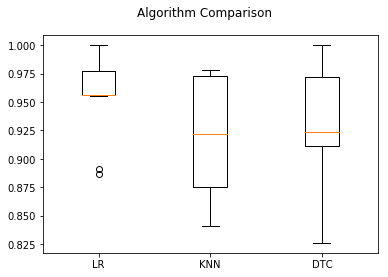

In [62]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()